<a href="https://www.kaggle.com/code/marcelocruzeta/machine-learning-experiment?scriptVersionId=248826787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Personality Classification Project

## Project Overview

This project aims to classify individuals as either Introverts or Extroverts based on various behavioral and social characteristics using machine learning techniques. The primary objective is to build and validate models that can effectively predict personality types from input features derived from a dataset.

## Dataset

The dataset used in this project comprises responses to questions related to social behavior, emotional experiences, and personal preferences. Key features include:

- **Stage_fear**: Indicating fear of public speaking.
- **Drained_after_socializing**: Reflecting how individuals feel after interacting socially.
- **Time_spent_Alone**: The amount of time spent alone.
- **Social_event_attendance**: Frequency of attendance at social events.
- **Going_outside**: How often individuals engage in outdoor activities.
- **Friends_circle_size**: The size of their social circle.
- **Post_frequency**: How often they post on social media.

## Methodology

### Data Preprocessing
- **Handling Missing Values**: Categorical variables were filled with 'Unknown' and mapped to numeric values. Numeric features were imputed using the `IterativeImputer` technique to fill in any missing gaps.
- **Model**: Data was split into training and sets to train and evaluate model performance effectively.

### Model Training
Three distinct machine learning models were utilized to predict personality types:
1. **Random Forest Classifier**: A robust ensemble learning method used for classification tasks.
2. **CatBoost Classifier**: A gradient boosting library that efficiently handles categorical features without extensive pre-processing.
3. **XGBoost Classifier**: An optimized gradient boosting framework designed for speed and performance.

The models underwent training on the training dataset, followed by evaluation on the validation set to assess their accuracy and classification metrics. 

### Majority Voting for Consensus
To enhance prediction reliability, predictions from the three models were combined using a majority voting approach. For each prediction:
- If at least two out of three models agree on a personality type, that type is selected as the final prediction.
- This method helps mitigate individual model biases and improves overall prediction robustness.

## Final Submission
The final predictions were compiled into a submission file named `submission.csv`, containing two columns: `id` and `Predicted_Personality`, ready for evaluation and further analysis.

## Unique Aspects of the Project
- **Ensemble Modeling**: The use of three different models and majority voting showcases the effectiveness of ensemble learning in achieving high prediction accuracy.
- **Data Imputation Strategy**: The employment of `IterativeImputer` for filling missing numeric values is a sophisticated approach that maintains data integrity and relationships between features.
- **Multi-Model Comparison**: This project emphasizes the importance of evaluating and comparing multiple models to ensure the best possible results, reflecting a thorough understanding of model performance and selection.

## Conclusion
This project illustrates a complete machine learning pipeline, from data preprocessing to model training and final prediction submission, demonstrating effective techniques for personality classification based on behavioral characteristics. Future enhancements could include hyperparameter tuning, model optimization, and exploring additional algorithms or features to further improve classification accuracy.

# 2. Imports

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.experimental import enable_iterative_imputer  # Needed to use IterativeImputer
from sklearn.impute import IterativeImputer  # For iterative imputation of missing values
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and validation sets
from sklearn.ensemble import RandomForestClassifier  # Importing the Random Forest classifier for model training
from sklearn.metrics import classification_report, accuracy_score  # For evaluating model performance metrics
from catboost import CatBoostClassifier  # Importing the CatBoost classifier for gradient boosting on decision trees
import xgboost as xgb  # Importing the XGBoost classifier
from collections import Counter  # Importing Counter for counting hashable objects, useful for tallying predictions
from tabulate import tabulate  # For displaying the DataFrame with borders
from colorama import Fore, Style  # Import Colorama for coloring text
from sklearn.tree import DecisionTreeClassifier  # Using a decision tree model
from IPython.display import display  # For displaying DataFrames nicely in Jupyter
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD  # For dimensionality reduction
import matplotlib.pyplot as plt  # Ensure to import matplotlib for plotting


# 3. Data Processing and Prediction

In this notebook, we demonstrate how to preprocess the training and test datasets, train a decision tree classifier, and make predictions based on the test dataset.

## 1. Load Datasets

We start by loading the training (`train.csv`) and test (`test.csv`) datasets into pandas DataFrames.

## 2. Preprocessing Data

The preprocessing function is defined to handle the following steps:

- **Impute Missing Values**: We fill missing values for categorical variables (`Stage_fear` and `Drained_after_socializing`) by mapping them to numerical values:
  - 'Yes' is converted to 1
  - 'No' is converted to 0
  - 'Unknown' is converted to -1

- **Iterative Imputation for Numeric Values**: We apply Iterative Imputation to fill in any missing values in numeric columns:
  - `Time_spent_Alone`
  - `Social_event_attendance`
  - `Going_outside`
  - `Friends_circle_size`
  - `Post_frequency`

## 3. Prepare Training Data

The target variable `Personality` is extracted from the training dataset and mapped to numeric values:
- `Introvert` is mapped to 0
- `Extrovert` is mapped to 1

The feature DataFrame (`X`) is created by removing the `id` and `Personality` columns from the original training DataFrame.

## 4. Train the Model

A decision tree classifier is instantiated and trained using the features `X` and the target variable `y`.

## 5. Process the Test Data

Similar preprocessing steps are applied to the test dataset. The `id` column is removed, and the test features are prepared for predictions.

## 6. Make Predictions

Using the trained model, we predict the `Personality` values for the test dataset. The predicted values are then added to the `X_test` DataFrame.

## 7. Display Results

Finally, we display the first 10 rows of both the processed training and test DataFrames with styled headers for better readability.


In [2]:
def preprocess(df):
    # Make a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Map categorical variables to numerical values
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    
    # Select numeric columns for imputation
    num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
    
    # Use IterativeImputer to fill missing numeric values
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess the training dataset keeping the 'Personality' column
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Remove 'Personality' for features
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Define target variable

# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)  # Fit the model with features X and target y

# Preprocess the test dataset
X_test = preprocess(test.drop('id', axis=1))  # Similar preprocessing for the test data

# Predict the Personality values for the test dataset
predicted_personality = model.predict(X_test)

# Add the predictions to the X_test DataFrame
X_test['Personality'] = predicted_personality

# Display the first 10 rows of X with styled formatting
styled_X = X.head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black'), ('padding', '5px')]
                    }])

# Display the first 10 rows of X_test with styled formatting
styled_X_test = X_test.head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                              .set_table_styles([{
                                  'selector': 'th',
                                  'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                              }, {
                                  'selector': 'td',
                                  'props': [('border', '1px solid black'), ('padding', '5px')]
                              }])

# Display the styled DataFrames
display(styled_X)
display(styled_X_test)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.000000,0,6.000000,4.000000,0,15.000000,5.000000
1,1.000000,0,7.000000,3.000000,0,10.000000,8.000000
2,6.000000,1,1.000000,0.000000,-1,3.000000,0.000000
3,3.000000,0,7.000000,3.000000,0,11.000000,5.000000
4,1.000000,0,4.000000,4.000000,0,13.000000,5.664129
5,2.000000,0,8.000000,5.000000,0,9.323896,3.000000
6,1.000000,0,8.000000,4.868527,0,9.845790,4.000000
7,2.000000,0,8.000000,3.000000,0,4.000000,5.000000
8,4.000000,1,2.000000,1.000000,-1,0.000000,2.000000
9,1.000000,0,8.000000,6.000000,0,14.000000,9.000000


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3.000000,0,7.000000,4.000000,0,6.000000,5.145540,1
1,7.408681,1,0.000000,0.000000,1,5.000000,1.000000,0
2,3.000000,0,5.000000,6.000000,0,15.000000,9.000000,1
3,3.000000,0,4.000000,4.000000,0,5.000000,6.000000,1
4,9.000000,1,1.000000,2.000000,1,1.000000,1.000000,0
5,2.000000,0,5.000000,3.000000,0,10.000000,4.000000,1
6,3.000000,0,4.000000,5.000000,0,15.000000,5.000000,1
7,11.000000,1,2.000000,1.000000,1,4.000000,1.000000,0
8,2.000000,0,6.000000,4.578822,0,9.000000,6.000000,1
9,8.000000,-1,2.000000,1.000000,1,1.000000,1.000000,0


# 4. Data Scaling for Improved Model Performance

In this section, we will perform data scaling, an essential step to ensure that our features are on a similar scale. This can greatly improve the performance and convergence speed of many machine learning algorithms.

## 1. Import Libraries

We begin by importing the necessary libraries, including:
- `pandas` for data manipulation,
- `IterativeImputer` for handling missing values, and
- `MinMaxScaler` and `RobustScaler` for scaling our data.

## 2. Preprocessing Function

The `preprocess` function is defined to:
- Make a copy of the DataFrame to avoid modifying the original data.
- Fill missing values in categorical columns (`Stage_fear` and `Drained_after_socializing`) and map them to numerical values:
  - 'Yes' is converted to 1
  - 'No' is converted to 0
  - 'Unknown' is converted to -1
- Impute missing values in selected numeric columns using `IterativeImputer`.

## 3. Load Datasets

We load the training and test datasets into pandas DataFrames.

## 4. Preprocess Training Data

The training data is preprocessed by removing the `id` and `Personality` columns. The target variable `Personality` is mapped to numeric values:
- `Introvert` is mapped to 0
- `Extrovert` is mapped to 1

## 5. Scale Data

### Option 1: MinMaxScaler
We scale the training data using `MinMaxScaler`, which scales the features to a range between 0 and 1.

### Option 2: RobustScaler (commented out)
Alternatively, we have `RobustScaler`, which can be used to scale data and is robust to outliers. You can choose between the two based on your needs.

### Scaling Test Data
The test data is then scaled using the same fitted `MinMaxScaler` from the training data to ensure consistency between the training and testing datasets.

## 6. Display Results

Finally, we print the first 10 rows of both the scaled training and test DataFrames with styled headers for better readability. The styling includes borders around the cells and a colored header for clarity.

In [3]:
def preprocess(df):
    # Make a copy of the DataFrame
    df = df.copy()
    
    # Fill categorical variables and map them to numeric values
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    
    # Select numeric columns for imputation
    num_cols = ['Time_spent_Alone', 'Social_event_attendance',
                'Going_outside', 'Friends_circle_size',
                'Post_frequency']
    
    # Use IterativeImputer to fill missing numeric values
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess training data
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Remove 'Personality'
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Target variable

# Preprocess test data
X_test = preprocess(test.drop('id', axis=1))

# Scale the data using MinMaxScaler or RobustScaler
# Option 1: MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)

# Scale test data based on training data scaling
X_test_scaled = minmax_scaler.transform(X_test)  

# Display the first 10 rows of scaled training and test data with styled formatting
styled_X_scaled = pd.DataFrame(X_scaled, columns=X.columns).head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black'), ('padding', '5px')]
                    }])

styled_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns).head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                              .set_table_styles([{
                                  'selector': 'th',
                                  'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                              }, {
                                  'selector': 'td',
                                  'props': [('border', '1px solid black'), ('padding', '5px')]
                              }])

# Display the styled scaled DataFrames
display(styled_X_scaled)
display(styled_X_test_scaled)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.064210,0.500000,0.600000,0.571429,0.500000,1.000000,0.500000
1,0.149282,0.500000,0.700000,0.428571,0.500000,0.666667,0.800000
2,0.574641,1.000000,0.100000,0.000000,0.000000,0.200000,0.000000
3,0.319426,0.500000,0.700000,0.428571,0.500000,0.733333,0.500000
4,0.149282,0.500000,0.400000,0.571429,0.500000,0.866667,0.566413
5,0.234354,0.500000,0.800000,0.714286,0.500000,0.621593,0.300000
6,0.149282,0.500000,0.800000,0.695504,0.500000,0.656386,0.400000
7,0.234354,0.500000,0.800000,0.428571,0.500000,0.266667,0.500000
8,0.404497,1.000000,0.200000,0.142857,0.000000,0.000000,0.200000
9,0.149282,0.500000,0.800000,0.857143,0.500000,0.933333,0.900000


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.319426,0.500000,0.700000,0.571429,0.500000,0.400000,0.514554
1,0.694480,1.000000,0.000000,0.000000,1.000000,0.333333,0.100000
2,0.319426,0.500000,0.500000,0.857143,0.500000,1.000000,0.900000
3,0.319426,0.500000,0.400000,0.571429,0.500000,0.333333,0.600000
4,0.829856,1.000000,0.100000,0.285714,1.000000,0.066667,0.100000
5,0.234354,0.500000,0.500000,0.428571,0.500000,0.666667,0.400000
6,0.319426,0.500000,0.400000,0.714286,0.500000,1.000000,0.500000
7,1.000000,1.000000,0.200000,0.142857,1.000000,0.266667,0.100000
8,0.234354,0.500000,0.600000,0.654117,0.500000,0.600000,0.600000
9,0.744785,0.000000,0.200000,0.142857,1.000000,0.066667,0.100000


# 5. Dimensionality Reduction using Truncated SVD

In this section, we perform dimensionality reduction using **Truncated Singular Value Decomposition (Truncated SVD)**. This technique is particularly useful for reducing the dimensionality of a dataset while preserving as much information as possible, especially in situations with a large number of features.

## 1. Import Libraries

We begin by importing necessary libraries:
- `pandas` for data manipulation,
- `IterativeImputer` for handling missing values,
- `MinMaxScaler` for feature scaling, and
- `TruncatedSVD` for performing dimensionality reduction.

## 2. Preprocessing Function

The `preprocess` function is defined to:
- Create a copy of the DataFrame to avoid modifying the original data.
- Fill missing values in categorical columns (`Stage_fear` and `Drained_after_socializing`) and map them to numerical values in a consistent manner.
- Impute missing values in selected numeric columns using `IterativeImputer`.

## 3. Load Datasets

Both the training (`train.csv`) and test (`test.csv`) datasets are loaded into pandas DataFrames.

## 4. Preprocess Training and Test Data

The training data is preprocessed by removing the `id` and `Personality` columns. The target variable `Personality` is extracted and mapped to numeric values.

## 5. Scale Data

We scale the features using **MinMaxScaler**, which transforms the features to a range between 0 and 1. The same scaler is then applied to the test data to ensure that the scaling is consistent across both datasets.

## 6. Implement Truncated SVD

Now, we apply Truncated SVD for dimensionality reduction:
- We specify the number of components to retain (in this case, 2 components).
- The training scaled data is fitted and transformed into a lower-dimensional space.
- The same transformation is applied to the scaled test data.

## 7. Display Results

Finally, we print the first 10 rows of the transformed training and test datasets, named `tSVD1` and `tSVD2`, for verification. The displayed results are styled for clarity, with headers colored for better readability.

In [4]:
def preprocess(df):
    # Make a copy of the DataFrame
    df = df.copy()
    
    # Fill categorical variables and map them to numeric values
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    
    # Select numeric columns for imputation
    num_cols = ['Time_spent_Alone', 'Social_event_attendance',
                'Going_outside', 'Friends_circle_size',
                'Post_frequency']
    
    # Use IterativeImputer to fill missing numeric values
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess training data
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Removing 'Personality'
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Target variable

# Preprocess test data
X_test = preprocess(test.drop('id', axis=1))

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Implement Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)  # Set the number of components
X_svd = svd.fit_transform(X_scaled)  # Fit and transform the training scaled data
X_test_svd = svd.transform(X_test_scaled)  # Transform the test scaled data

# Display the first 10 rows of SVD results with styled formatting
styled_X_svd = pd.DataFrame(X_svd, columns=['tSVD1', 'tSVD2']).head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black'), ('padding', '5px')]
                    }])

styled_X_test_svd = pd.DataFrame(X_test_svd, columns=['tSVD1', 'tSVD2']).head(10).style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                              .set_table_styles([{
                                  'selector': 'th',
                                  'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                              }, {
                                  'selector': 'td',
                                  'props': [('border', '1px solid black'), ('padding', '5px')]
                              }])

# Display the styled SVD DataFrames
display(styled_X_svd)
display(styled_X_test_svd)

,tSVD1,tSVD2
0,1.478407,-0.279219
1,1.453559,-0.222262
2,0.631282,0.666747
3,1.404734,-0.070362
4,1.389694,-0.165007
5,1.429716,-0.135202
6,1.454505,-0.209197
7,1.239238,-0.009484
8,0.690545,0.509534
9,1.822226,-0.486557


,tSVD1,tSVD2
0,1.338790,-0.026092
1,1.110037,1.135905
2,1.767611,-0.339190
3,1.226046,0.052644
4,1.195740,1.157094
5,1.243508,-0.004231
6,1.516726,-0.145936
7,1.290080,1.196569
8,1.428646,-0.143970
9,0.767344,0.651007


# 6. Visualization of Truncated SVD Results

In this section, we visualize the results of the Truncated Singular Value Decomposition (SVD) for the training data. This allows us to observe how the data points are distributed in the reduced-dimensional space.

## 1. Creating a DataFrame for SVD Components

First, we create a DataFrame `svd_df` that includes the two principal components obtained from the SVD (denoted as `tSVD1` and `tSVD2`). We also add the target variable, `Personality`, to this DataFrame, which will be used to color the data points in the plot.

## 2. Plotting the SVD Results

- A scatter plot is generated to display the relationship between the two components:
  - The x-axis represents the first component (`tSVD1`), while the y-axis shows the second component (`tSVD2`).
  - Points are colored according to the `Personality` target variable, allowing us to visually differentiate between "Introvert" and "Extrovert" individuals.

### 2.1 Adding Noise for Clarity

To improve the visualization, we add a small amount of random noise to the `tSVD1` and `tSVD2` components. This helps to prevent overplotting and provides clearer separation between the points, enhancing the readability of the plot.

## 3. Legend Customization

To improve readability, we replace the numerical labels (`0` and `1`) with descriptive labels ("Introvert" and "Extrovert") in the plot's legend. This makes it easier for viewers to interpret the visual representation of the data.

## 4. Displaying the Plot

Finally, we render the plot and adjust its layout to ensure all components are displayed neatly. We also set limits for the x and y axes to focus on the most relevant part of the data.

This visualization provides a clear understanding of how different personality types are distributed in the reduced-dimensional space, helping in interpreting the SVD results effectively. The addition of noise improves the clarity and separation of the data points in the final plot.

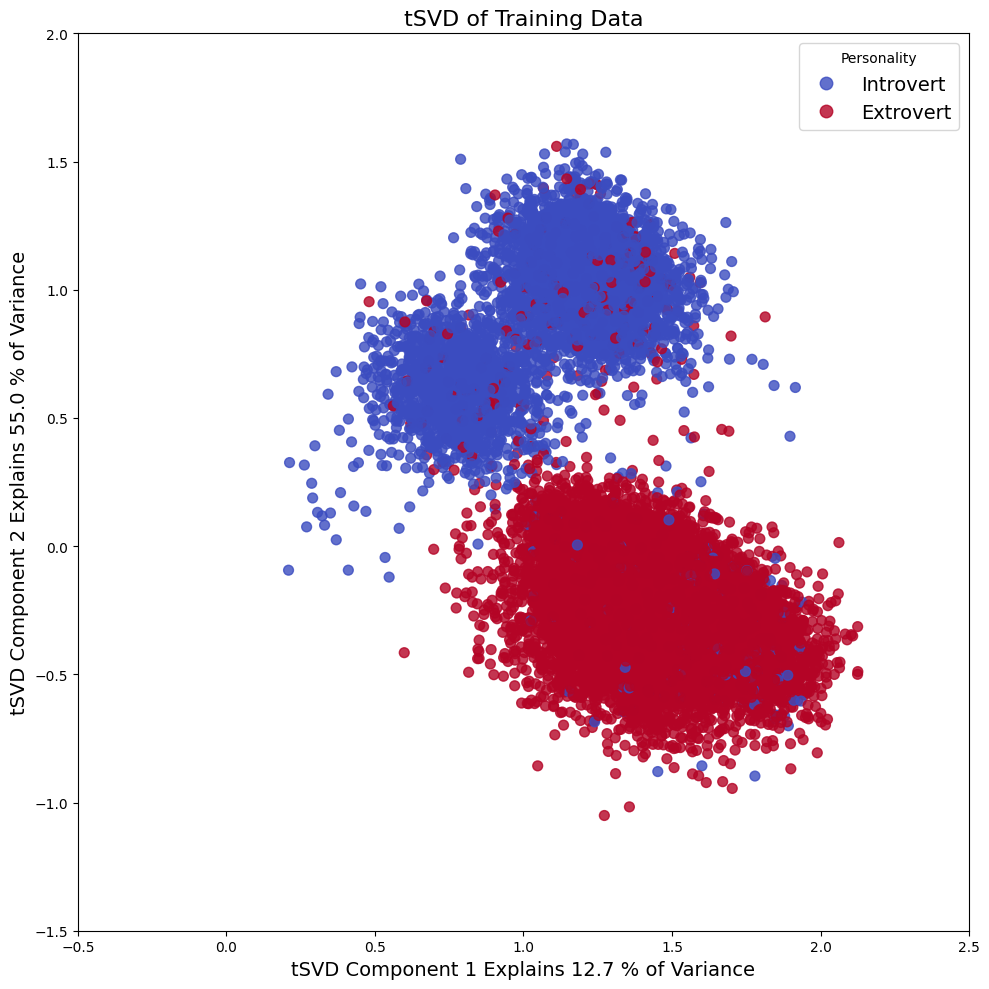

In [5]:
# Create a DataFrame to include the tSVD components and the target variable
svd_df = pd.DataFrame(data=X_svd, columns=['tSVD1', 'tSVD2'])
svd_df['Personality'] = y  # Add the target variable (0: Introvert, 1: Extrovert)

# Adding small random noise to enhance visualization
noise_scale = 0.1  # Change this value for more or less spacing
tSVD1_noisy = svd_df['tSVD1'] + np.random.normal(0, noise_scale, size=len(svd_df))
tSVD2_noisy = svd_df['tSVD2'] + np.random.normal(0, noise_scale, size=len(svd_df))

# Plotting the SVD results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tSVD1_noisy, tSVD2_noisy,
                      c=svd_df['Personality'], cmap='coolwarm', alpha=0.8, s=50, marker='o')

plt.title("tSVD of Training Data", fontsize=16)
plt.xlabel("tSVD Component 1 Explains %.1f %% of Variance" % (svd.explained_variance_ratio_[0] * 100.0), fontsize=14)
plt.ylabel("tSVD Component 2 Explains %.1f %% of Variance" % (svd.explained_variance_ratio_[1] * 100.0), fontsize=14)

# Create a custom legend
# Map numbered labels to text labels
handles, labels = scatter.legend_elements() 
new_labels = ['Introvert', 'Extrovert']
plt.legend(handles, new_labels, title="Personality", loc='best', markerscale=1.5, prop={'size': 14})

plt.xlim(-0.5, 2.5)  # Adjust x limit as needed to accommodate noise
plt.ylim(-1.5, 2)    # Adjust y limit as needed to accommodate noise

plt.tight_layout()
plt.show()

# 7. Random Forest Model Training and Prediction

This section outlines the process of training a Random Forest classifier and making predictions for personality types: "Introvert" and "Extrovert".

1. **Data Splitting**: The preprocessed dataset is divided into training and validation sets to enable the evaluation of the model's performance.
   
2. **Model Initialization and Training**: A Random Forest Classifier is initialized with a specified random state and is trained on the training data.

3. **Model Evaluation**: The accuracy and performance of the model are evaluated using the validation dataset. This includes calculating accuracy scores and generating a classification report.

4. **Making Predictions**: Predictions are made for personality types using the trained model on the test dataset.

5. **Mapping Predictions**: The numerical predictions are mapped back to their descriptive labels, specifically 'Introvert' and 'Extrovert'.

6. **Creating Output DataFrame**: A DataFrame is created containing the test IDs along with their corresponding predicted personalities for easy assessment.

7. **Saving Results**: The results are saved to a CSV file for further analysis and review.

This process utilizes a machine learning approach to effectively classify personality types based on behavioral traits, allowing for a systematic exploration of relationships between features and outcomes.

In [6]:
# Preprocessing function
def preprocess(df):
    df = df.copy()
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess training and test data
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Remove 'Personality'
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Map target variable

X_test = preprocess(test.drop('id', axis=1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Map back to original labels
test_predictions_labels = np.where(test_predictions == 0, 'Introvert', 'Extrovert')

# Create a DataFrame to save the results with descriptive labels
results = pd.DataFrame({'id': test['id'], 'Predicted_Personality': test_predictions_labels})

# Save the results to CSV
results.to_csv('result_r_forest.csv', index=False)  # Random Forest results

Validation Accuracy: 0.9670715249662618
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       952
           1       0.97      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



# 8. Visualization of Random Forest Predictions

In this section, we visualize the predictions made by the Random Forest model for personality types: "Introvert" and "Extrovert". The objective is to assess how well the model separates the two classes in the feature space.

## 1. Preparing the Scatter Plot

We create a scatter plot using the features of the test dataset. To enhance visualization and reduce overlap between points, a small amount of random noise is added to the feature values.

- The x-axis represents one feature (`Time Spent Alone`), while the y-axis represents another feature (`Social Event Attendance`). These features will help in visualizing the distribution of predictions.

## 2. Coloring Points Based on Predictions

Data points are colored according to their predicted personality type:
- "Introvert" is represented in one color (e.g., blue).
- "Extrovert" is represented in another color (e.g., red).
  
This allows for easy visual differentiation between the two classes.

## 3. Adding a Custom Legend

A custom legend is included to provide clear labels for the "Introvert" and "Extrovert" classes, ensuring that the visualization is intuitive and easily interpretable.

## 4. Rendering the Plot

Finally, the plot is rendered with appropriately set axes limits, providing a clear view of how the predictions are distributed with respect to the features. This visualization aids in understanding how effectively the Random Forest model classifies different personality types based on behavioral traits.

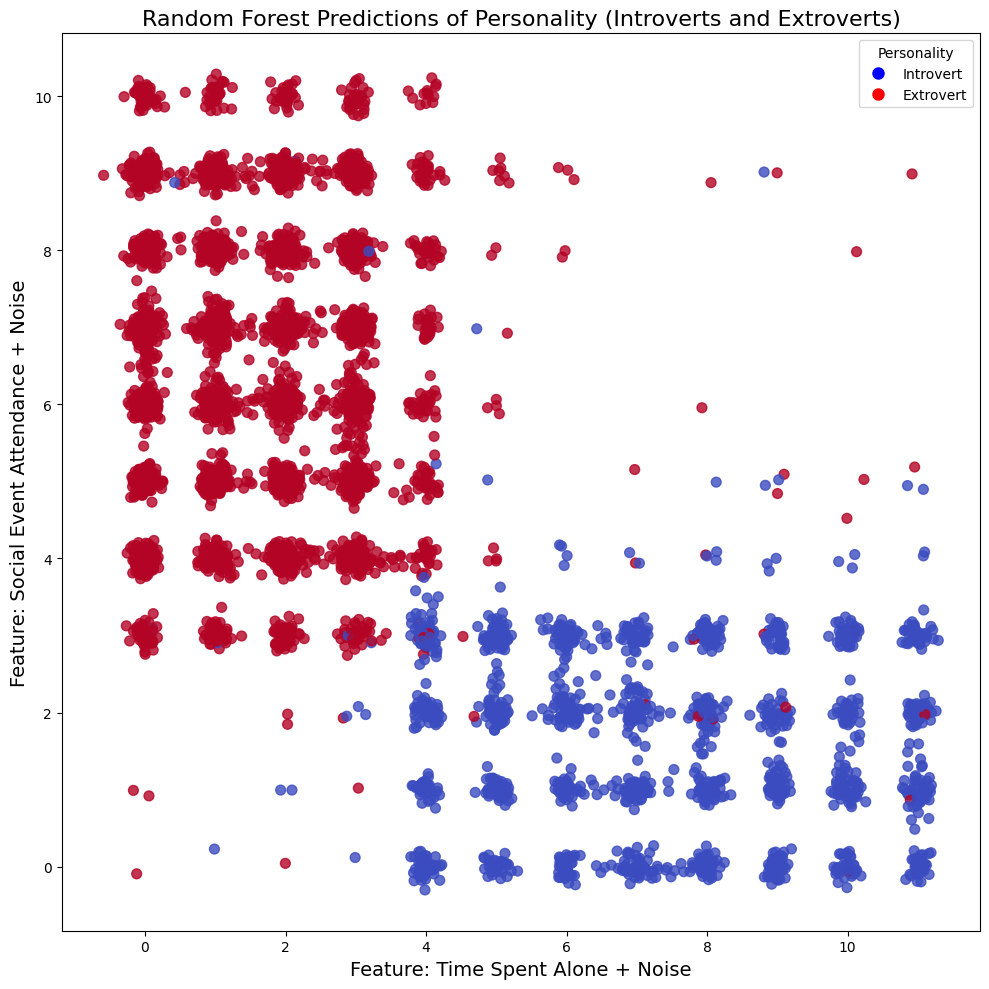

In [7]:
# Visualizing the Predictions
plt.figure(figsize=(10, 10))

# Adding noise to the features to disperse the points
noise_scale = 0.1  # Adjust the noise scale as needed
plt.scatter(X_test['Time_spent_Alone'] + np.random.normal(0, noise_scale, size=len(X_test)),
            X_test['Social_event_attendance'] + np.random.normal(0, noise_scale, size=len(X_test)),
            c=[1 if label == 'Extrovert' else 0 for label in test_predictions_labels],
            cmap='coolwarm', alpha=0.8, s=50, marker='o')

plt.title("Random Forest Predictions of Personality (Introverts and Extroverts)", fontsize=16)
plt.xlabel("Feature: Time Spent Alone + Noise", fontsize=14)
plt.ylabel("Feature: Social Event Attendance + Noise", fontsize=14)

# Custom legend for Introverts and Extroverts
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  # Adjust color as necessary
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  # Adjust color as necessary

# Add the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality")

plt.tight_layout()
plt.show()

# 9. CatBoost Model Training and Prediction 

This section describes the steps for using the CatBoost classifier to predict personality types.

1. Initialize the CatBoost model with specific parameters.
2. Fit the model on the training data.
3. Make predictions on the validation set and evaluate the model's accuracy and performance.
4. Predict personality types for the test dataset.
5. Map predictions back to 'Introvert' or 'Extrovert'.
6. Create a DataFrame to store the test IDs and predicted personalities.
7. Save the results to a CSV file for further analysis.

This process employs the CatBoost algorithm for effective personality classification based on behavioral data.

In [8]:
# Preprocessing function
def preprocess(df):
    df = df.copy()
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess training and test data
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Remove 'Personality'
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Map target variable

X_test = preprocess(test.drop('id', axis=1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost model with adjustable parameters
catboost_model = CatBoostClassifier(
    iterations=1000,                  # Increase the number of iterations
    learning_rate=0.05,               # Decrease the learning rate
    depth=6,                          # Adjust the depth
    l2_leaf_reg=3,                    # Use L2 regularization to prevent overfitting
    bagging_temperature=0.75,         # Adjust the bagging temperature
    random_state=42,
    verbose=100                       # Keep verbose for monitoring progress
)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = catboost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

# Make predictions on the test set
catboost_predictions = catboost_model.predict(X_test)

# Map back to original labels
catboost_predictions_labels = np.where(catboost_predictions == 0, 'Introvert', 'Extrovert')

# Create a DataFrame to save the results with descriptive labels
catboost_results = pd.DataFrame({'id': test['id'], 'Predicted_Personality': catboost_predictions_labels})

# Save the results to CSV
catboost_results.to_csv('/kaggle/working/result_c_boost.csv', index=False)  # Save results

0:	learn: 0.6115963	total: 60.1ms	remaining: 1m
100:	learn: 0.1211846	total: 539ms	remaining: 4.8s
200:	learn: 0.1150357	total: 1.02s	remaining: 4.07s
300:	learn: 0.1097797	total: 1.51s	remaining: 3.5s
400:	learn: 0.1050673	total: 1.99s	remaining: 2.98s
500:	learn: 0.1006788	total: 2.47s	remaining: 2.46s
600:	learn: 0.0968893	total: 2.95s	remaining: 1.96s
700:	learn: 0.0937049	total: 3.43s	remaining: 1.46s
800:	learn: 0.0909915	total: 3.91s	remaining: 972ms
900:	learn: 0.0884843	total: 4.39s	remaining: 482ms
999:	learn: 0.0858910	total: 4.87s	remaining: 0us
Validation Accuracy: 0.9673
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



# 10. Visualization of CatBoost Predictions

Similar to the previous visualization for the Random Forest model, in this section, we visualize the predictions made by the CatBoost model for personality types: "Introvert" and "Extrovert". This visualization allows us to assess how well the CatBoost model separates the two classes in the feature space.

## 1. Preparing the Scatter Plot

A scatter plot is created using the features from the CatBoost test dataset. As before, a small amount of random noise is added to the feature values to enhance visualization and reduce overlap between points.

- The x-axis represents one feature (e.g., `Time Spent Alone`), and the y-axis represents another feature (e.g., `Social Event Attendance`).

## 2. Coloring Points Based on Predictions

Data points are colored according to their predicted personality type:
- "Introvert" is represented in one color (e.g., blue).
- "Extrovert" is represented in another color (e.g., red).

This color-coding allows for easy visual differentiation between the two classes.

## 3. Adding a Custom Legend

A custom legend is included to provide clear labels for the "Introvert" and "Extrovert" classes, ensuring the visualization is intuitive and easily interpretable.

## 4. Rendering the Plot

Finally, the plot is displayed with appropriate axis limits. The visualization aids in understanding how effectively the CatBoost model classifies different personality types based on behavioral traits.

By comparing this visualization with the previous one for Random Forest, we can observe any differences in the classification patterns and effectiveness of the two models.

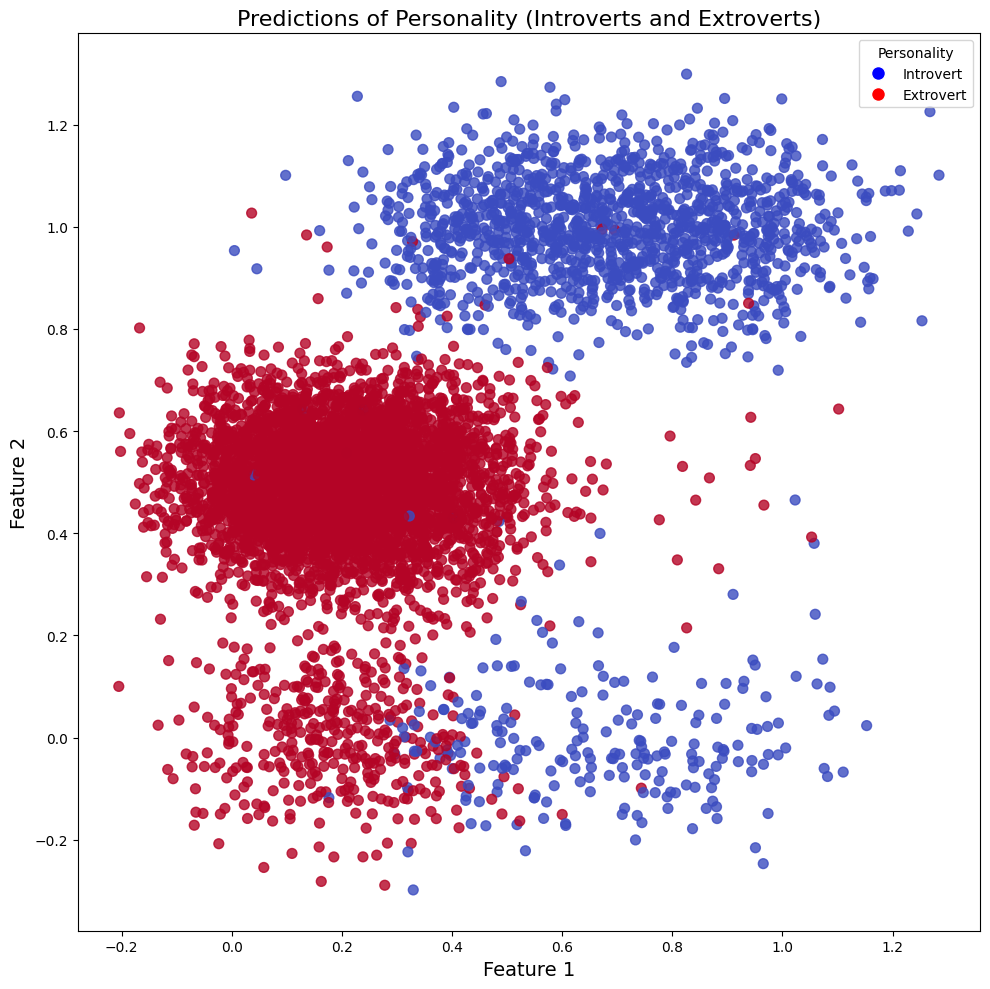

In [9]:
# Vamos usar as duas primeiras colunas do X_test, se disponíveis, ou características que você deseja usar para visualização
plt.figure(figsize=(10, 10))

# Use as características originais de teste para a visualização
# Se tiver apenas uma dimensão, isso precisa ser ajustado
if X_test.shape[1] > 1:
    feature1 = X_test_scaled[:, 0] + np.random.normal(0, 0.1, size=len(X_test_scaled))
    feature2 = X_test_scaled[:, 1] + np.random.normal(0, 0.1, size=len(X_test_scaled))
else:
    feature1 = X_test_scaled[:, 0] + np.random.normal(0, 0.1, size=len(X_test_scaled))
    feature2 = np.zeros(len(X_test_scaled))  # Se o X_test não tiver uma segunda coluna

# Scatter plot
scatter = plt.scatter(feature1, feature2,
                      c=[1 if label == 'Extrovert' else 0 for label in results['Predicted_Personality']],
                      cmap='coolwarm', alpha=0.8, s=50, marker='o')

plt.title("Predictions of Personality (Introverts and Extroverts)", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)  # Você pode rotular de acordo com as características que está usando
plt.ylabel("Feature 2", fontsize=14)

# Custom legend labels
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  # Adjust color as necessary
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  # Adjust color as necessary

# Add the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality")

plt.tight_layout()
plt.show()

# 11. XGBoost Model Training and Prediction

This section outlines the use of the XGBoost classifier to predict personality types: "Introvert" and "Extrovert".

1. **Model Initialization**: Initialize the XGBoost model with specified parameters, ensuring to set options suited for handling categorical features effectively.
   
2. **Model Training**: Fit the model on the training data to learn the patterns associated with each personality type.

3. **Model Evaluation**: Make predictions on the validation set and evaluate the accuracy and performance using metrics such as accuracy score and classification report.

4. **Making Predictions**: Predict personality types for the test dataset using the trained model.

5. **Label Mapping**: Map the numerical predictions back to their descriptive labels, specifically 'Introvert' and 'Extrovert'.

6. **Creating Output DataFrame**: Create a DataFrame to store the test IDs along with their corresponding predicted personalities for easy assessment.

7. **Results Saving**: Save the results to a CSV file for further analysis and review.

8. **Visualization of Predictions**: Following the predictions, the results are visualized to show the distribution of personality types in relation to the test features, allowing for an intuitive understanding of how the model classifies the different personality traits.

This process applies the XGBoost algorithm for effective personality classification based on behavioral data, facilitating deeper insights into the relationships within the dataset.

In [10]:
# Preprocessing function
def preprocess(df):
    df = df.copy()
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
    imputer = IterativeImputer(random_state=42)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

# Load the datasets
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Preprocess training and test data
X = preprocess(train.drop(['id', 'Personality'], axis=1))  # Remove 'Personality'
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Map target variable

X_test = preprocess(test.drop('id', axis=1))

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgboost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

# Make predictions on the test data
xgboost_predictions = xgboost_model.predict(X_test_scaled)

# Map back to original labels
xgboost_predictions_labels = np.where(xgboost_predictions == 0, 'Introvert', 'Extrovert')

# Create a DataFrame to save the results with descriptive labels
xgboost_results = pd.DataFrame({'id': test['id'], 'Predicted_Personality': xgboost_predictions_labels})

# Save the results to CSV
xgboost_results.to_csv('result_xg_boost.csv', index=False)  # Save results

Validation Accuracy: 0.9665
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       952
           1       0.97      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



# 12. Visualization of XGBoost Predictions

In this section, we visualize the predictions made by the XGBoost model for personality types: "Introvert" and "Extrovert". This visualization helps us assess how well the model separates the two classes in the feature space.

## 1. Preparing the Scatter Plot

We create a scatter plot using the features from the test dataset. To enhance the visualization and reduce overlap between data points, a small amount of random noise is added to the feature values.

- The x-axis represents one feature (e.g., `Time Spent Alone`), while the y-axis represents another feature (e.g., `Social Event Attendance`). These features help visualize the distribution of predictions.

## 2. Coloring Points Based on Predictions

Data points are colored according to their predicted personality type:
- "Introvert" is represented in one color (e.g., blue).
- "Extrovert" is represented in another color (e.g., red).

This color-coding allows for easy visual differentiation between the two classes.

## 3. Adding a Custom Legend

A custom legend is included to provide clear labels for the "Introvert" and "Extrovert" classes, ensuring that the visualization is intuitive and easily interpretable.

## 4. Rendering the Plot

Finally, the plot is rendered with appropriately set axes limits, providing a clear view of how the predictions are distributed with respect to the features. This visualization aids in understanding how effectively the XGBoost model classifies different personality types based on behavioral traits. By comparing this visualization with previous plots, we can observe the classification patterns across different models, allowing for deeper insights into the predictive performance.

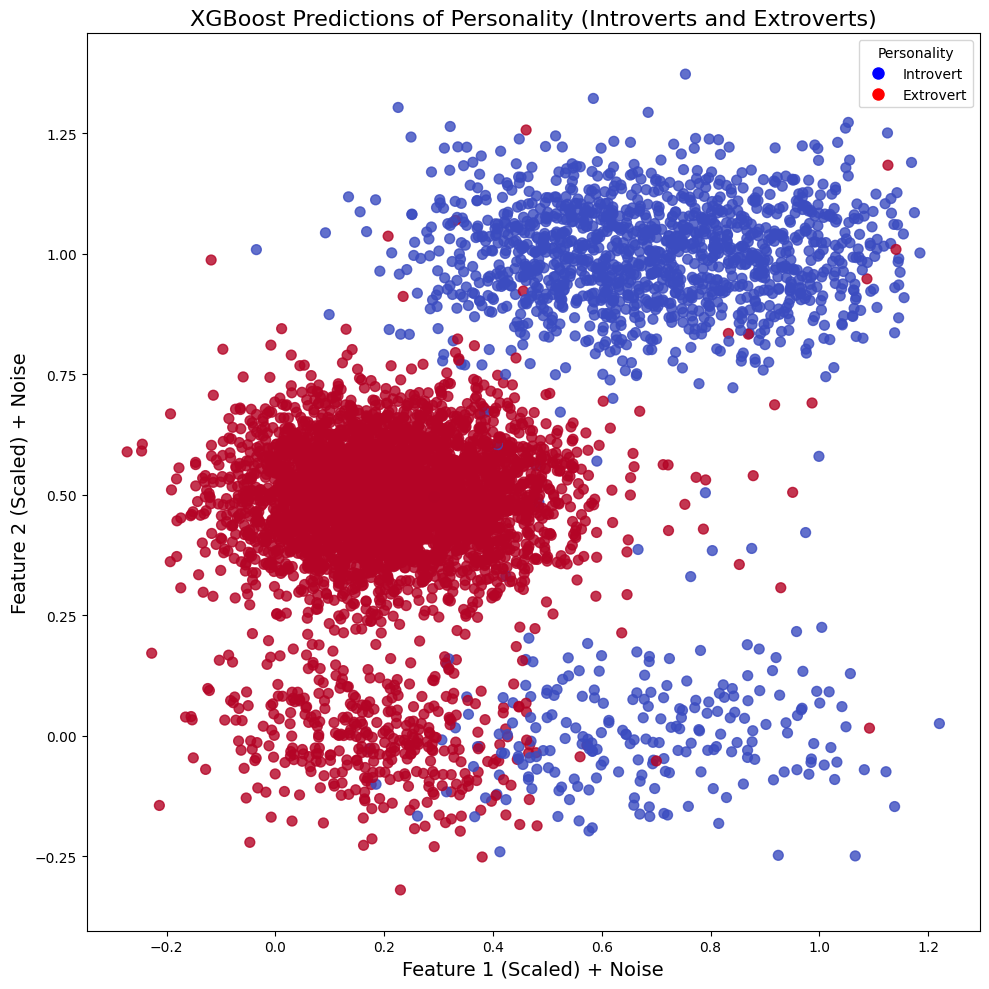

In [11]:
# Plotting the Predictions from XGBoost
plt.figure(figsize=(10, 10))

# Adding noise to the features for better visualization
noise_scale = 0.1  # Adjust the noise scale as needed
plt.scatter(X_test_scaled[:, 0] + np.random.normal(0, noise_scale, size=len(X_test_scaled)), 
            X_test_scaled[:, 1] + np.random.normal(0, noise_scale, size=len(X_test_scaled)),
            c=[1 if label == 'Extrovert' else 0 for label in xgboost_predictions_labels],
            cmap='coolwarm', alpha=0.8, s=50, marker='o')

plt.title("XGBoost Predictions of Personality (Introverts and Extroverts)", fontsize=16)
plt.xlabel("Feature 1 (Scaled) + Noise", fontsize=14)
plt.ylabel("Feature 2 (Scaled) + Noise", fontsize=14)

# Custom legend for Introverts and Extroverts
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  # Adjust color as necessary
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  # Adjust color as necessary

# Add the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality")

plt.tight_layout()
plt.show()

### 13. Merging Model Predictions and Final Voting

This section of the notebook focuses on merging predictions from different models (Random Forest, CatBoost, and XGBoost) and applying majority voting to finalize the personality classification results.

## Steps Overview

1. **Load Results**: Import prediction results from the previously trained models.
2. **Load Test Data**: Import the original feature data associated with the test dataset.
3. **Ensure ID Consistency**: Convert all 'id' columns to string type to facilitate merging.
4. **Rename Prediction Columns**: Change prediction column names for clarity and consistency across models.
5. **Merge Predictions**: Combine the predictions from different models into a single DataFrame based on the 'id'.
6. **Define Majority Voting Function**: Establish a function to determine the final prediction based on the majority of model votes.
7. **Apply Majority Voting**: Use the voting function to derive the final predictions for each entry.
8. **Check for Divergence**: Create a new column indicating if the models disagreed on the predictions.
9. **Filter Divergent Predictions**: Retain only those rows where model predictions differ.
10. **Prepare Features DataFrame**: Create a DataFrame containing the relevant features for further analysis.
11. **Merge Feature Data with Divergent Predictions**: Combine the features with the predictions to analyze cases of divergence.
12. **Print Results**: Display the DataFrame containing divergent predictions along with their corresponding feature data.

This approach allows for a comprehensive analysis of model predictions and helps ensure robust classification outcomes.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import statistics
from IPython.display import display  # To display DataFrames nicely

# Load the results from previous models
rf_results = pd.read_csv('/kaggle/working/result_r_forest.csv')  # Random Forest results
catboost_results = pd.read_csv('/kaggle/working/result_c_boost.csv')  # CatBoost results
xgboost_results = pd.read_csv('/kaggle/working/result_xg_boost.csv')  # XGBoost results

# Load the original feature data (test set)
test_data = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Prepare 'id' columns
for df in [rf_results, catboost_results, xgboost_results, test_data]:
    df['id'] = df['id'].astype(str)  # Ensure all 'id' columns are of the same type

# Rename the prediction columns for clarity
rf_results.rename(columns={'Predicted_Personality': 'Random Forest'}, inplace=True)
catboost_results.rename(columns={'Predicted_Personality': 'CatBoost'}, inplace=True)
xgboost_results.rename(columns={'Predicted_Personality': 'XGBoost'}, inplace=True)

# Merge results on 'id'
comparison_df = rf_results.merge(catboost_results, on='id')
comparison_df = comparison_df.merge(xgboost_results, on='id')

# Define a function to determine majority voting
def majority_vote(row):
    predictions = [row['Random Forest'], row['CatBoost'], row['XGBoost']]
    return statistics.mode(predictions)  # Get the most common prediction

# Apply the majority vote function to each row
comparison_df['Final Prediction'] = comparison_df.apply(majority_vote, axis=1)

# Create a new column to check if predictions differ
comparison_df['Divergence'] = (comparison_df['Random Forest'] != comparison_df['Final Prediction']) | \
                              (comparison_df['CatBoost'] != comparison_df['Final Prediction']) | \
                              (comparison_df['XGBoost'] != comparison_df['Final Prediction'])

# Filter to keep only those rows where there is a divergence
divergent_predictions_df = comparison_df[comparison_df['Divergence']]

# Prepare features DataFrame from test data
feature_columns = ['Time_spent_Alone', 'Stage_fear', 
                   'Social_event_attendance', 'Going_outside', 
                   'Drained_after_socializing', 'Friends_circle_size', 
                   'Post_frequency']  # Original feature names

features_df = test_data[feature_columns].copy()
features_df['id'] = test_data['id'].astype(str)  # Add the id for merging

# Merge the feature columns with the divergent predictions DataFrame
divergent_predictions_df = divergent_predictions_df.merge(features_df, on='id', how='left')

# Prepare the DataFrame for displaying with styled formatting
divergent_predictions_to_print = divergent_predictions_df[['id', 'Random Forest', 'CatBoost', 'XGBoost', 
                                                           'Time_spent_Alone', 'Stage_fear', 
                                                           'Social_event_attendance', 'Going_outside', 
                                                           'Drained_after_socializing', 'Friends_circle_size', 
                                                           'Post_frequency']].copy()

# Display the DataFrame with divergent predictions formatted with borders
styled_divergent_predictions = divergent_predictions_to_print.style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"') \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('border', '1px solid black'), ('padding', '5px'), ('background-color', '#87CEFA'), ('color', 'black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black'), ('padding', '5px')]
                    }])

# Display the styled DataFrame including the id column
print("\nDivergent Predictions (with Feature Columns):")
display(styled_divergent_predictions)  # Display the styled DataFrame (index will not be shown automatically)


Divergent Predictions (with Feature Columns):


,id,Random Forest,CatBoost,XGBoost,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18753,Introvert,Extrovert,Extrovert,nan,No,9.000000,6.000000,No,6.000000,3.000000
1,18876,Extrovert,Introvert,Introvert,10.000000,No,nan,6.000000,No,10.000000,7.000000
2,18973,Introvert,Introvert,Extrovert,9.000000,Yes,2.000000,0.000000,Yes,nan,2.000000
3,18977,Extrovert,Introvert,Extrovert,5.000000,No,9.000000,7.000000,No,11.000000,3.000000
4,19707,Introvert,Extrovert,Introvert,2.000000,No,6.000000,5.000000,No,15.000000,9.000000
5,19774,Extrovert,Extrovert,Introvert,6.000000,No,9.000000,3.000000,No,13.000000,5.000000
6,20017,Introvert,Introvert,Extrovert,0.000000,Yes,3.000000,3.000000,Yes,5.000000,3.000000
7,20033,Introvert,Introvert,Extrovert,nan,Yes,2.000000,2.000000,Yes,5.000000,7.000000
8,20153,Extrovert,Introvert,Introvert,7.000000,Yes,2.000000,7.000000,Yes,3.000000,6.000000
9,20905,Extrovert,Introvert,Introvert,9.000000,nan,3.000000,2.000000,Yes,4.000000,0.000000


# 14. Generating Submission File from Model Predictions

This section describes the process of creating the final submission file `submission.csv` using the predictions obtained from various machine learning models (Random Forest, CatBoost, and XGBoost).

## Steps Overview

1. **Load Predictions**: The predictions from the three models are loaded into a DataFrame named `comparison_df`. This DataFrame contains the predicted personality types from each model.

2. **Define Voting Function**: A function (`final_prediction`) is defined to determine the final prediction for each entry by applying a majority voting mechanism. The function:
   - Counts the predictions from the three models for a given row.
   - Selects the prediction that appears most frequently as the final prediction.

3. **Compute Final Predictions**: The majority vote function is applied to each row of the `comparison_df` to create a new column called `Final_Prediction`. This column encapsulates the final decision on the predicted personality based on the majority.

4. **Prepare Submission DataFrame**: A new DataFrame (`submission_df`) is created containing only the `id` and the `Final_Prediction`, which is renamed to `Predicted_Personality` for clarity.

5. **Save to CSV**: The final DataFrame is saved as a CSV file named `submission.csv`, ready for submission or further analysis.

This approach ensures that the predictions included in the submission file are based on the majority consensus of the models, thereby increasing the chances of obtaining accurate and reliable results.

In [13]:
import pandas as pd
from collections import Counter

# Assuming you already have a DataFrame 'comparison_df' filled with predictions from the models
# Define a function to determine the final prediction using majority voting
def final_prediction(row):
    # Record the predictions of each model using full names
    predictions = [row['Random Forest'], row['CatBoost'], row['XGBoost']]
    # Calculate the majority vote
    majority_vote = Counter(predictions).most_common(1)[0][0]  # Get the most common prediction
    return majority_vote

# Add the final prediction column to the DataFrame
comparison_df['Final Prediction'] = comparison_df.apply(final_prediction, axis=1)

# Create the submission DataFrame
submission_df = comparison_df[['id', 'Final Prediction']].copy()
submission_df.rename(columns={'Final Prediction': 'Predicted_Personality'}, inplace=True)

# Optionally check for any null values in predicted personalities
if submission_df['Predicted_Personality'].isnull().any():
    print("Warning: There are null values in the predictions.")

# Save the DataFrame as a CSV
submission_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' has been created.")

Submission file 'submission.csv' has been created.


# 15. Visualization of Random Forest Predictions

In this section, we visualize the predictions made by the Random Forest model for personality types: "Introvert" and "Extrovert". This visualization allows us to assess how well the model separates the two classes in the feature space.

## 1. Preparing the Scatter Plot

A scatter plot is created using two features from the test dataset:
- The x-axis represents `Time Spent Alone`, and the y-axis represents `Social Event Attendance`.
- To enhance visualization and reduce overlap between data points, a small amount of random noise is added to the feature values.

## 2. Coloring Points Based on Predictions

Data points are colored according to their predicted personality type:
- "Introvert" is represented in one color (e.g., blue).
- "Extrovert" is represented in another color (e.g., red).

This color-coding allows for easy visual differentiation between the two classes.

## 3. Adding a Custom Legend

A custom legend is included to provide clear labels for the "Introvert" and "Extrovert" classes, ensuring that the visualization is intuitive and easily interpretable.

## 4. Rendering the Plot

Finally, the plot is displayed with appropriately set axes limits, providing a clear view of how the predictions are distributed with respect to the features. This visualization helps us understand how effectively the Random Forest model classifies different personality types based on behavioral traits. By comparing this visualization with previous plots, we can observe the classification patterns across different models, allowing for deeper insights into the predictive performance.

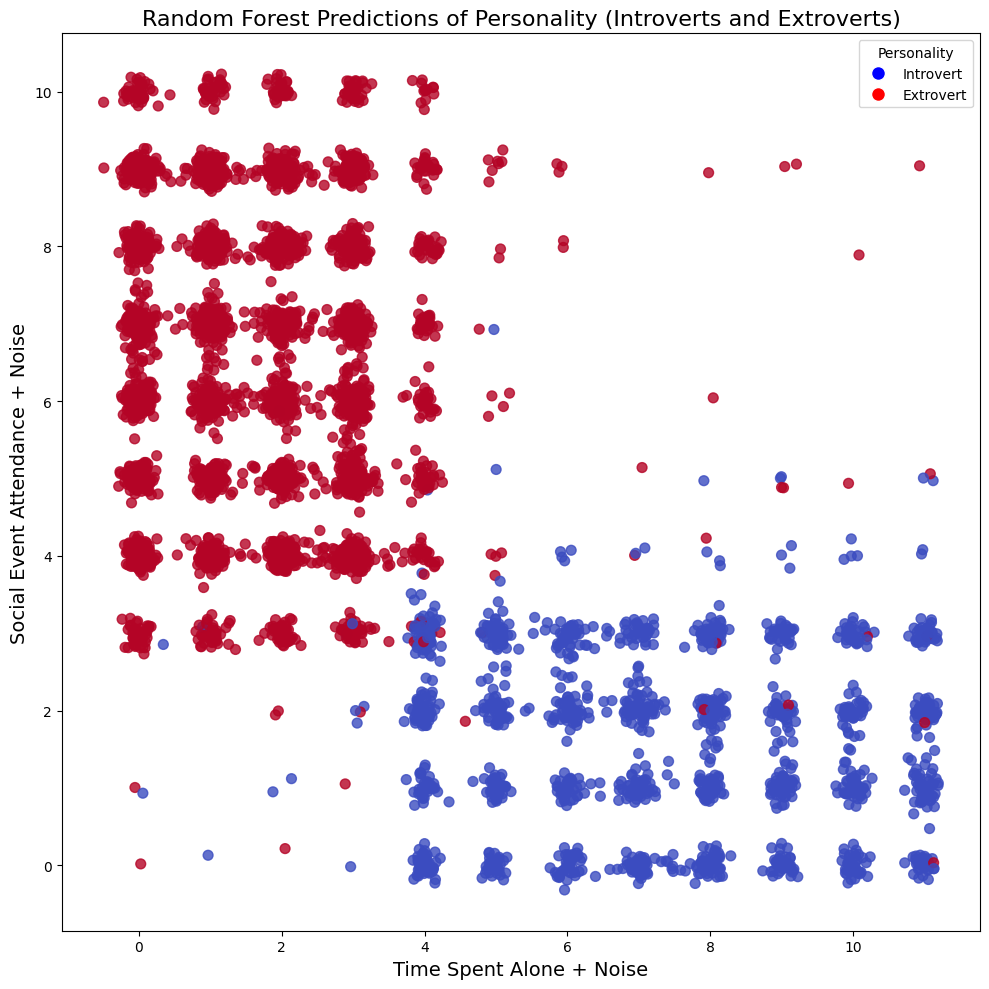

In [14]:
import matplotlib.pyplot as plt

# Plotting the Predictions from Random Forest
plt.figure(figsize=(10, 10))

# Adding noise to the features to disperse the points
noise_scale = 0.1  # Adjust the noise scale as needed
plt.scatter(X_test['Time_spent_Alone'] + np.random.normal(0, noise_scale, size=len(X_test)), 
            X_test['Social_event_attendance'] + np.random.normal(0, noise_scale, size=len(X_test)),
            c=[1 if label == 'Extrovert' else 0 for label in submission_df['Predicted_Personality']],
            cmap='coolwarm', alpha=0.8, s=50, marker='o')

plt.title("Random Forest Predictions of Personality (Introverts and Extroverts)", fontsize=16)
plt.xlabel("Time Spent Alone + Noise", fontsize=14)
plt.ylabel("Social Event Attendance + Noise", fontsize=14)

# Custom legend for Introverts and Extroverts
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  

# Add the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality")

plt.tight_layout()
plt.show()